In [1]:
%cd C:\Users\debie\Documents\anaconda_space

C:\Users\debie\Documents\anaconda_space


# Predicting the stock market

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
stock = pd.read_csv('sphist.csv')

In [4]:
stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [5]:
stock['Date'] = pd.to_datetime(stock['Date'])
stock.sort_values('Date', inplace = True)

In [6]:
stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
16589,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66
16588,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85
16587,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93
16586,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98
16585,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08


In [7]:
stock.dropna(axis = 0, inplace = True)
stock.reset_index(drop = True, inplace=True)

We'll now compute some indicators:

-The average price for the past 5 days

-The average price for the past 30 days

-The average price for the past 365 days

-The standard deviation of the price for the past 5 days

-The standard deviation of the price for the past 365 days

-The ratio between the average price for the past 5 days, and the average price for the past 365 days

-The ratio between the standard deviation of the price for the past 5 days, and the average price for the past 365 days

As a result, in the dataset we'll get rid of the row before 1951-01-03.

To make it more simply, for the data using the past 365 days we'll consider all the data that happened in the year before Whereas, for the past 5 or 30 days we'll use the last 5 or 30 trading days (the 5 or 30 row above the current row).

In [8]:
stock_51 = stock[stock['Date']>=datetime(year=1951, month=1, day=3)]

In [9]:
avg_5 = []
avg_30 = []
avg_365 = []
std_5 = []
std_365 = []
avg_rat = []
std_rat = []
a = []
for i in stock_51.iterrows():
    avg5 = stock.iloc[i[0]-5:i[0]]['Close'].mean()
    std5 = stock.iloc[i[0]-5:i[0]]['Close'].std()
    avg30 = stock.iloc[i[0]-30:i[0]]['Close'].mean()
    y = i[1][0].year
    m = i[1][0].month
    d = i[1][0].day
    if m == 2 and d == 29:
        avg365 = stock[(stock['Date']>=datetime(year=y-1, month=2, day=28)) & (stock['Date']<datetime(year=y, month=m, day=d))]['Close'].mean()
        std365 = stock[(stock['Date']>=datetime(year=y-1, month=2, day=28)) & (stock['Date']<datetime(year=y, month=m, day=d))]['Close'].std()
    else:
        avg365 = stock[(stock['Date']>=datetime(year=y-1, month=m, day=d)) & (stock['Date']<datetime(year=y, month=m, day=d))]['Close'].mean()
        std365 = stock[(stock['Date']>=datetime(year=y-1, month=m, day=d)) & (stock['Date']<datetime(year=y, month=m, day=d))]['Close'].std()
    ar = avg5 / avg365
    sr = std5 / std365
    avg_5.append(avg5)
    std_5.append(std5)
    avg_30.append(avg30)
    avg_365.append(avg365)
    std_365.append(std365)
    avg_rat.append(ar)
    std_rat.append(sr)

In [10]:
stock_51.reset_index(drop = True, inplace=True)
stock_51['avg_5'] = pd.Series(avg_5)
stock_51['std_5'] = pd.Series(std_5)
stock_51['avg_30'] = pd.Series(avg_30)
stock_51['avg_365'] = pd.Series(avg_365)
stock_51['std_365'] = pd.Series(avg_365)
stock_51['avg_ratio'] = pd.Series(avg_rat)
stock_51['std_ratio'] = pd.Series(std_rat)

C:\Users\debie\AppData\Local\Temp/ipykernel_19220/3808561960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_51['avg_5'] = pd.Series(avg_5)
C:\Users\debie\AppData\Local\Temp/ipykernel_19220/3808561960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_51['std_5'] = pd.Series(std_5)
C:\Users\debie\AppData\Local\Temp/ipykernel_19220/3808561960.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [11]:
stock_51.head()

,Date,Open,High,Low,Close,Volume,Adj Close,avg_5,std_5,avg_30,avg_365,std_365,avg_ratio,std_ratio
0,1951-01-03,20.690001,20.690001,20.690001,20.690001,3370000.0,20.690001,20.360000,0.304385,19.815000,18.406760,18.406760,1.106115,0.284902
1,1951-01-04,20.870001,20.870001,20.870001,20.870001,3390000.0,20.870001,20.514000,0.204524,19.842666,18.422880,18.422880,1.113507,0.190731
2,1951-01-05,20.870001,20.870001,20.870001,20.870001,3390000.0,20.870001,20.628000,0.214057,19.874000,18.438960,18.438960,1.118718,0.198429
3,1951-01-08,21.000000,21.000000,21.000000,21.000000,2780000.0,21.000000,20.726001,0.181879,19.907000,18.460643,18.460643,1.122713,0.167860
4,1951-01-09,21.120001,21.120001,21.120001,21.120001,3800000.0,21.120001,20.840001,0.117047,19.935000,18.470800,18.470800,1.128267,0.107068


In [12]:
train = stock_51[stock_51['Date'] < datetime(year=2013, month=1, day=1)]
test = stock_51[stock_51['Date'] >= datetime(year=2013, month=1, day=1)]

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()

In [18]:
features = ['avg_5', 'std_5', 'avg_30', 'avg_365', 'std_365', 'avg_ratio', 'std_ratio']
rmse_dict = {}
predictions_dict = {}
for feature in features:
    lr.fit(train[[feature]],train['Close'])
    predictions_dict[feature] = lr.predict(test[[feature]])
    mse = mean_squared_error(test['Close'], predictions_dict[feature])
    rmse_dict[feature] = np.sqrt(mse)
    
    

In [19]:
rmse_dict

{'avg_5': 22.209554877893996,
 'std_5': 1080.8893547223129,
 'avg_30': 40.45318897472191,
 'avg_365': 112.7229636064592,
 'std_365': 112.7229636064592,
 'avg_ratio': 1464.210323580945,
 'std_ratio': 1455.3032818251543}

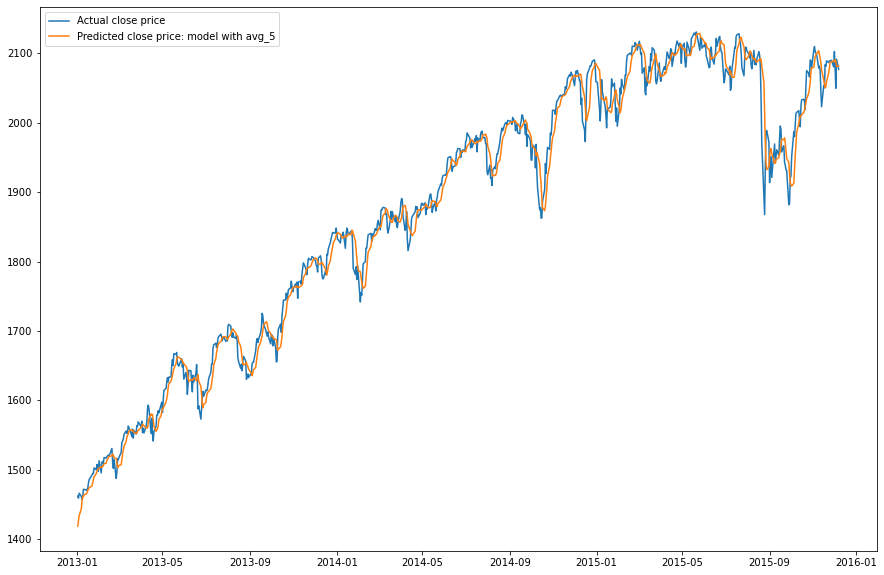

In [22]:
plt.figure(figsize = (15,10))
plt.plot(test['Date'], test['Close'], label='Actual close price')
plt.plot(test['Date'], predictions_dict['avg_5'], label='Predicted close price: model with avg_5')
plt.legend()


In [26]:
features = ['avg_5', 'avg_30', 'avg_365']
lr.fit(train[features],train['Close'])
predictions = lr.predict(test[features])
mse = mean_squared_error(test['Close'], predictions)
rmse = np.sqrt(mse)

In [27]:
rmse

22.222471330860596